# 4. Filtros IIR (Diseño)

En el Capítulo 1 se mostró que existen dos tipos de filtros digitales, FIR e IIR, dependiendo de la estructura de la ecuación en diferencia que conducen a comportamientos distintos en la forma de la respuesta al impulso: 

|      | FIR	|  IIR |
|------|------|------|
|Forma de $h[n]$ | Respuesta Finita al Impulso | Respuesta Infinita al Impulso |
|Ecuación en diferencias | $y[n] = \sum _{k=0} ^{Q} {b_k x[n-k]} $ | $y[n]=\sum _{k=0}^{Q}{b_k x[n-k]} - \sum _{k=1}^{P}{a_k y[n-k]}$ |
|Característica de la E.D. | Depende exclusivamente de entradas	| Depende de entradas y salidas |
|Cálculo de coeficientes | $b_k$ es la respuesta al impulso y se calcula por medio de $b_k = \mathcal{F} ^{-1} \{ H(\Omega) \}$	| $a_k$ y $b_k$ se calculan por medio de equivalencias con filtros analógicos |
|Respuesta en frecuencia | $H(\Omega) = \sum _{k=0} ^{Q} {b_k e^{-j \Omega k} }$ | $H(\Omega) =\frac{ \sum _{k=0} ^{Q} {b_k e^{-j \Omega k} } } { 1 + \sum _{k=1} ^{P} {a_k e^{-j \Omega k} }}$ |

En este capítulo se estudiará el diseño de los filtros de **respuesta infinita al impulso (IIR)** los cuales se caracterizan porque su ecuación en diferencias posee términos recursivos y no recursivos, es decir, la salida depende de salidas anteriores, la entrada actual y entradas anteriores:

$$y[n]=\sum_{k=0}^{Q}b_{k}x[n-k]-\sum_{k=1}^{P}a_{k}y[n-k]$$

La ecuación anterior es una adaptación de la ecuación en diferencias mostrada en el Capítulo 1, en la cual se ha despejado la salida actual, $y[n]$, y se asume un valor del coeficiente $a_{0}=1$, es decir, se han normalizando todos los coeficientes, $a_{k}$ y $b_{k}$, por $a_{0}$. 

Para estos filtros, su función de transferencia será entonces:

$$H(z)=\frac{\sum_{k=0}^{Q}b_{k}z^{-k}}{1+\sum_{k=1}^{P}a_{k}z^{-k}}$$ 

y su respuesta en frecuencia (aplicando la sustitución $z=\exp(j\Omega)$):

$$H(\Omega)=\frac{\sum_{k=0}^{Q}b_{k}\exp(-j\Omega k)}{1+\sum_{k=1}^{P}a_{k}\exp(-j\Omega k)}$$

Si analizamos con cuidado la función de transferencia, $H(z)$, podemos notar que está caracterizada principalmente por polos y ceros, a diferencia con los sistemas FIR, los cuales dependían exclusivamente de los ceros (recuerde que los polos del filtro FIR siempre se encontraban en el origen). Esta dependencia de los polos hace posible que un sistema IIR pueda ser inestable si algunos de sus polos se encuentran por fuera del círculo unitario. La inestabilidad puede presentarse cuando se lleva a cabo el proceso de cuantización de los coeficientes $a_{k}$ y $b_{k}$ en una implementación en punto fijo, lo cual se mostrará en el Capítulo 6. Por esta razón se dice que los sistemas IIR son sensibles a los efectos de palabra de longitud finita.

Una diferencia crucial con respecto a los sistemas FIR está en la imposibilidad de contar con fase lineal. Esto se demuestra porque es imposible llevar la respuesta en frecuencia $H(\Omega)$ a una forma funcional $H(\Omega)=\exp(jc\Omega)F(\Omega)$, con $F(\Omega)$ una función exclusivamente real, condición de fase lineal que se demostró en la Sección 2.2.2 para los filtros FIR. Es interesante anotar que si un sistema IIR tuviera fase lineal, sería inestable, ya que la condición de fase lineal (Sección 2.2.2), 

$$H(z)=\pm z^{-(N_{h}-1)}H(z^{-1})$$

sugiere que debe existir una función de transferencia estable $H(z)$ tal que los polos del filtro queden de nuevo dentro del círculo unitario al hacer el cambio de variable $H(z^{-1})$. Esta condición es imposible de cumplir para un filtro IIR porque los polos no están en el origen, como era el caso de los filtros FIR. 

Pero no todo es malo en los filtros IIR. En comparación con los FIR tienen dos ventajas significativas:

1. Requieren muy pocos coeficientes para obtener una respuesta en frecuencia similar un filtro FIR con una elevada longitud de la respuesta al impulso, lo que los hace ideales en la implementación de sistemas LTI digitales que se ejecutan en plataformas de baja capacidad de cómputo como los microcontroladores. Esto se debe a que el cálculo de $y[n]$ exige la dependencia de salidas anteriores, la cuales pueden ser vistas como memorias de longitud infinita de entradas anteriores. 

2. Los filtros IIR no exhiben el efecto _Gibbs_ en su respuesta en frecuencia, puesto que ésta no depende exclusivamente de ceros como en el caso de los filtros FIR. 

Para concluir, podemos ver en la ecuación en diferencias que el diseño de los filtros IIR consiste en encontrar los coeficientes $a_{k}$ y $b_{k}$, relacionados con la función de transferencia del filtro en términos de la transformada z, $H(z)$. $H(z)$ se calcula comúnmente partiendo del modelo analógico (en términos de $H(s)$) y aplicando alguna transformación $s\rightarrow z$ como la **transformación bilineal** o la **invarianza al impulso**, las cuales serán estudiadas en próximas secciones.

## 4.1 Filtros IIR y Ubicación de los Polos y Ceros

Para entender las características que rigen la forma de la respuesta en frecuencia de los filtros digitales y cómo estas están relacionadas con la estabilidad es importante conocer el impacto de la ubicación de los polos y los ceros sobre la respuesta en frecuencia. 

Debemos recordar que toda función de transferencia se puede factorizar en ceros ($z_{1}, z_{2}, ... z_{n}$) y polos ($p_{1}, p_{2}, ... p_{n}$) de la siguiente forma:

$$H(z)=\frac{(z-z_{1})(z-z_{2})...(z-z_{n})}{(z-p_{1})(z-p_{2})...(z-p_{n})}$$

Cada uno de los términos entre paréntesis puede ser visto como un vector formado entre la posición del cero o polo y un punto z sobre el círculo unitario ubicado a un ángulo $\Omega$, ya que $z=\exp(j\Omega)$ (radio=1 y ángulo=$\Omega$). En la siguiente figura se muestra la forma como se construyen dichos vectores para un cero real y un polo complejo conjugado.

![Interpretación geométrica de los polos y ceros](../img/cap4_zgeom.png)

De esta forma, tenemos que según la interpretación geométrica de la transformada z, la magnitud de la respuesta en frecuencia es igual al producto de la longitud de los vectores de los ceros, dividido por el producto de la longitud de los vectores de los polos. Y la fase del sistema es igual a la sumatoria de las fases de los vectores de los ceros menos la sumatoria de la fase de los vectores de los polos: 

$$\left|H(\Omega)\right|=\frac{\left|z-z_{1}\right|\left|z-z_{2}\right|...\left|z-z_{n}\right|}{\left|z-p_{1}\right|\left|z-p_{2}\right|...\left|z-p_{n}\right|}=\frac{\left|e^{j\Omega}-z_{1}\right|\left|e^{j\Omega}-z_{2}\right|...\left|e^{j\Omega}-z_{n}\right|}{\left|e^{j\Omega}-p_{1}\right|\left|e^{j\Omega}-p_{2}\right|...\left|e^{j\Omega}-p_{n}\right|}$$

y

$$\begin{array}{r}
\angle{H(\Omega)}=\angle{(e^{j\Omega}-z_{1})}+\angle{(e^{j\Omega}-z_{2})}+...+\angle{(e^{j\Omega}-z_{n})}\\
-\left\{ \angle{(e^{j\Omega}-p_{1})}+\angle{(e^{j\Omega}-p_{2})}+...+\angle{(e^{j\Omega}-p_{n})}\right\} 
\end{array}$$

Así que para un polo o cero simple $F_{1}(\Omega)=\exp(j\Omega)-\alpha$:

$$\left|F_{1}(\Omega)\right|=\sqrt{\left[cos(\Omega)-\alpha\right]^{2}+sen^{2}(\Omega)}=\sqrt{1-2cos(\Omega)\alpha+\alpha^{2}}$$

Al emplear la expresión de la magnitud para $F_{1}$ se encuentra que:

* Un polo real positivo: pasa-bajo 
* Un polo real negativo: pasa-alto 
* Un cero real negativo: pasa-bajo 
* Un cero real positivo: pasa-alto 

Como se muestra en la siguiente figura:

![Filtros IIR de primer orden](../img/cap4_zgeom2.png)

El valor de $\alpha$ está relacionado con la frecuencia de corte del filtro. Para un polo, si $\alpha$ está más cerca del círculo unitario, la ganancia del punto máximo aumenta, pero la frecuencia de corte disminuye como se verá en el siguiente ejemplo.

#### Ejemplo 4.1
Para construir un pasa-bajo se puede usar un polo real ubicado a una distancia $\alpha$ de la forma:

$$H(z)=\frac{z}{z-\alpha}$$

El cero en el origen permite compensar el polo, con el fin de que el sistema sea realizable en la práctica. Supongamos que $\alpha = 0.6785$.

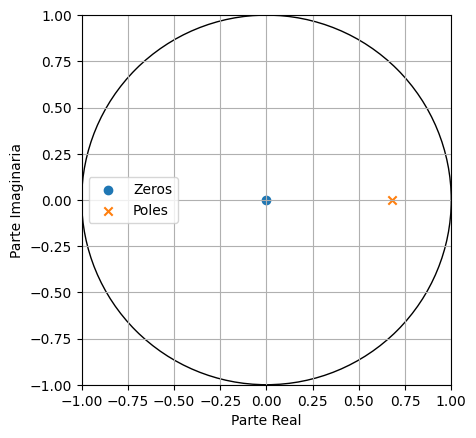

Máxima ganancia: 3.1104199066874028
Ganancia en la frecuencia de corte: 2.199399008356291
Frecuencia de corte: 0.125 pi


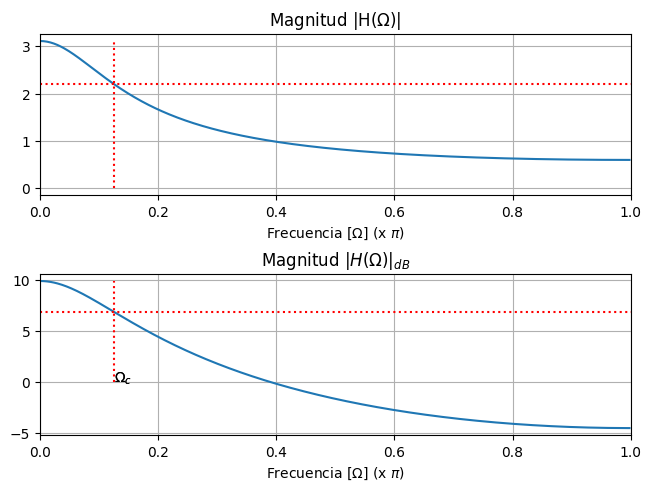

In [1]:
#Ejemplo 4.1. Análisis de un filtro pasa-bajo IIR de primer orden.
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

alpha = 0.6785
bk = [1, 0]
ak = [1, -alpha]

#Crea la función de transferencia
sys = sig.TransferFunction(bk, ak, dt=0.1)

def zplane(sys):
    #Grafica la ubicación de polos y ceros
    fig, ax = plt.subplots()
    ax.scatter(sys.zeros.real, sys.zeros.imag, marker='o', label='Zeros')
    ax.scatter(sys.poles.real, sys.poles.imag, marker='x', label='Poles')
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginaria')
    ax.grid(True)
    ax.legend()
    #Superpone el círculo unitario
    unit_circle = plt.Circle((0, 0), 1 , fill = False)
    ax.set_aspect(1)
    ax.add_artist(unit_circle)
    maxv = np.max([np.max(np.abs(sys.zeros.real)), np.max(np.abs(sys.zeros.imag)), np.max(np.abs(sys.poles.real)), np.max(np.abs(sys.zeros.imag)), 1])
    ax.set(xlim=(-maxv,maxv), ylim=(-maxv,maxv))
    plt.show()

zplane(sys)

#Grafica la respuesta en frecuencia en absoluto y decibeles
w, Hw = sig.freqz(bk,ak)

max_gain = np.max(np.abs(Hw))
cutoff_gain = max_gain/np.sqrt(2)
idx = np.argmin( np.abs(np.abs(Hw)-cutoff_gain) )
Omegac = w[idx]/np.pi

print(f'Máxima ganancia: {max_gain}')
print(f'Ganancia en la frecuencia de corte: {cutoff_gain}')
print(f'Frecuencia de corte: {Omegac} pi')

#Grafica magnitud de la respuesta en frecuencia en absoluto y en decibeles 
fig, axs = plt.subplots(2,1,layout='constrained')
axs[0].plot(w/np.pi, np.abs(Hw))
axs[0].plot([0,1],[cutoff_gain,cutoff_gain],'r:')
axs[0].plot([Omegac,Omegac],[0,max_gain],'r:')
axs[0].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[0].set_title(r'Magnitud |H($\Omega$)|')
axs[0].set(xlim=(0,1))
axs[0].grid()
axs[1].annotate(r'$\Omega_{c}$', xy=(Omegac,0))
axs[1].plot(w/np.pi, 20*np.log10(np.abs(Hw)))
axs[1].plot([0,1],[20*np.log10(cutoff_gain),20*np.log10(cutoff_gain)],'r:')
axs[1].plot([Omegac,Omegac],[0,20*np.log10(max_gain)],'r:')
axs[1].set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs[1].set_title(r'Magnitud $|H(\Omega)|_{dB}$')
axs[1].set(xlim=(0,1))
axs[1].grid()
axs[1].annotate(r'$\Omega_{c}$', xy=(Omegac,0))
plt.show()

Puede notarse de la respuesta en frecuencia que la máxima ganancia del sistema se encuentra en la frecuencia 0 y es igual, por construcción geométrica, igual a:

$H(0)=\frac{1}{1-\alpha}=\frac{1}{1-0.6785}=3.11042$

Ya que la distancia desde el punto $exp(j0)$ hacia el cero es 1 y desde dicho punto al polo es $1-\alpha$. 

Por otra parte, la frecuencia de corte es donde la ganancia del filtro tiene una pérdida de -3dB, los cuales corresponden en términos absolutos a una caída de $\sqrt{2}$ con respecto a la máxima amplitud de la respuesta del sistema, esto es:

$$\left|H(\Omega_{c})\right|=\frac{H(0)}{\sqrt{2}}=\frac{1}{(1-\alpha)\sqrt{2}}=2.2$$

la cual se presenta a la frecuencia de corte $\Omega_{c}=\pi/8$:

$$\left|F_{1}(\Omega_{c})\right|=(1-\alpha)\sqrt{2}=\sqrt{1-2cos(\Omega_{c})\alpha+\alpha^{2}}$$
$$2 (1-\alpha)^{2}=1-2cos(\Omega_{c})\alpha+\alpha^{2}$$
$$\Omega_{c} = acos\left(\frac{1+\alpha^{2}-2(1-\alpha)^{2}}{2\alpha}\right)=\frac{\pi}{8}$$

#### Para Reflexionar
* Analice en el código anterior, el efecto sobre la ganancia máxima y la frecuencia de corte cuando el polo se acerca al círculo unitario o al origen.
* La ecuación $F_{1}(\Omega)$ se usó en el ejemplo anterior para calcular la frecuencia de corte $\Omega_{c}$, pero se podría también usar para calcular $\alpha$ según el valor deseado de la frecuencia de corte. Diseñe un filtro pasa-bajo con frecuencia de corte $\pi/4$.

Los polos complejos conjugados tienen la propiedad de dar un comportamiento de filtro pasa-banda, donde el ancho de banda está determinado por el valor del radio $r$. Los ceros conjugados, en cambio, dan un comportamiento de filtro atrapa-banda, sin embargo, su ancho de banda no puede ser controlado tan fácilmente como los polos. Por tal razón para el diseño de un filtro atrapa-banda se coloca un cero complejo conjugado sobre el círculo unitario y un polo complejo conjugado cerca de éste, con el fin de controlar el ancho de banda. Además un filtro pasa-banda puede mejorarse si se añaden ceros en $z=\pm1$, para anular las frecuencias 0 y $f_{s}/2$. Estos aspectos se muestran en la siguiente Figura.

![Filtros IIR de segundo orden](../img/cap4_zgeom3.png)

Por ejemplo, un filtro atrapa-banda con frecuencia central $\Omega_{0}=\pi/4$ y un ancho de banda $BW=\pi/40$ se puede diseñar ubicando un cero complejo conjugado con $r=1$ en $\Omega_{0}=\pm\pi/4$, así como un polo complejo conjugado en $\Omega_{0}=\pm\pi/4$ pero con radio $r=1-BW/2=1-(\pi/40)/2=0.961$. $H(z)$ será entonces:

$$H(z)=\frac{(z-exp(j\Omega_{0}))(z-exp(-j\Omega_{0}))}{(z-0.961exp(j\Omega_{0}))(z-0.961exp(-j\Omega_{0}))}$$

$$H(z)=\frac{1-\sqrt{2}z+z^{2}}{0.961-1.3590z+z^{2}}$$

#### Para Reflexionar

* Modifique el código del Ejemplo 4.1 para implementar el filtro atrapa-banda calculado anteriormente.
* Analice lo que ocurre con la ganancia máxima, frecuencia central y selectividad del filtro atrapa-banda cuando el radio del polo complejo conjugado se acerca al círculo unitario.

## 4.2 Diseño de Filtros FIR a partir de Filtros Analógicos

Como se mostró en la sección anterior, diseñar un filtro digital IIR ubicando manualmente los polos y los ceros es una tarea bastante compleja, por ello, como se comentó al inicio del capítulo, los filtros IIR se diseñan a partir de un modelo en tiempo continuo descrito en términos de la transformada de Laplace $H(s)$. 

Para ilustrar como se realiza este proceso, en la siguiente figura se muestra el circuito eléctrico de un filtro RC pasa-bajo y pasa-alto, los cuales tienen asociadas las siguientes funciones de transferencia:

![Filtros RC](../img/cap4_hs_analog.png)

$$H_{LP}(s)=\frac{1}{1+sRC}$$

y

$$H_{HP}(s)=\frac{s}{1+sRC}$$

donde puede notarse que el filtro pasa-bajo tiene un cero real en el infinito y el pasa-alto tiene el cero en el origen, sin embargo tienen en común la misma disposición de polos, la cual define la forma de las bandas de paso, transición y rechazo. 

Si se añadieran más etapas en cascada con la misma estructura RC, disminuirá el ancho de la banda de transición y el filtro se hará más selectivo. De nuevo, tanto el modelo pasa-bajo como el pasa-alto tendrán algo en común, la disposición de sus polos. Bajo este principio nacen las familia de filtros analógicos, que establecen la configuración de los polos y ceros del modelo pasa-bajo, quien mediante transformaciones de la variable $s$ se puede convertir en pasa-alto, pasa-banda o rechaza-banda como se muestra en la siguiente tabla.

*Tabla 4.2.1*. Transformaciones de filtros

| Tipo de Filtro |	Transformación |
|------|------|
|Pasa-bajo	|$\frac{s}{\omega_{c}}$ |
|Pasa-alto	|$\frac{\omega_{c}}{s}$ |
|Pasa-banda	|$\frac{\omega_{0}}{BW}\left(\frac{s}{\omega_{0}}+\frac{\omega_{0}}{s}\right)$ |
|Rechaza-banda	|$\frac{BW}{\omega_{0}\left(\frac{s}{\omega_{0}}+\frac{\omega_{0}}{s}\right)}$ |
 
Cada una de las familias define una función de transferencia normalizada de un filtro pasa-bajo con frecuencia de corte igual a uno ($\omega_{c}=1 rad/s$), por tal motivo se ha incluido en la tabla anterior la transformación pasabajo-pasabajo. Nótese que las conversiones a pasa-banda y rechaza-banda duplican el número de polos y ceros del filtro pasa-bajo equivalente. Para los filtros pasa-banda y rechaza-banda la frecuencia central $\omega_{0}=\sqrt{\omega_{1}\omega_{2}}$ y el ancho de banda $BW=\omega_{2}-\omega_{1}$, dependen de las frecuencias de corte inferior $\omega_{1}$ y superior $\omega_{2}$.

En la siguiente tabla se presentan las familias de filtros analógicos y sus características principales. Para una descripción de las ecuaciones que definen la función de transferencia de cada familia consultar las referencias. 

*Tabla 4.2.2*. Características de las familias de filtros

| Familia | Función de transferencia filtro pasa-bajo | Forma banda de paso | Forma banda de rechazo | Selectividad | Comando en Python |
|------|------|------|------|------|------|
| Butterworth | Depende exclusivamente de polos | Plana | Plana | Baja | ``sig.butter`` |
| Chebyshev Tipo I | Depende exclusivamente de polos | Rizado | Plana | Alta | ``sig.cheby1`` |
| Chebyshev Tipo II | Depende de polos y ceros | Plana | Rizado | Alta | ``sig.cheby2`` |
| Elíptica | Depende de polos y ceros | Rizado | Rizado | Muy Alta | ``sig.ellip`` |
| Bessel | Depende exclusivamente de polos | Plana | Plana | Muy Baja | ``sig.bessel`` |

En la siguiente simulación se muestra en mejor detalle la respuesta en frecuencia de las diferentes familias.

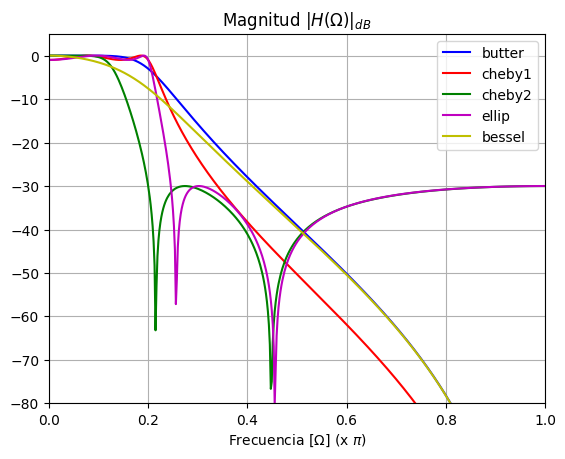

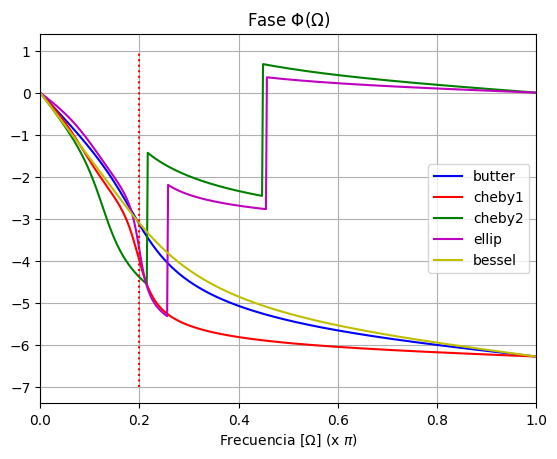

In [3]:
# Ejemplo 4.2. Grafica la magnitud (en decibeles) y la fase de la respuesta en frecuencia
# para las familias de filtros analógicos
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 4    #Orden del filtro
omegac = 0.2  #Omega_c = 0.2pi
Rp = 1   #Rizado en la banda de paso (Para Cheby1 y Ellip)
Rs = 30    #Rizado en la banda de rechazo (Para Cheby2 y Ellip)

fig0, axs0 = plt.subplots()
fig1, axs1 = plt.subplots()

#Familia Butterworth
b, a = sig.butter(N, omegac, 'lowpass')
w, Hw = sig.freqz(b,a) 
axs0.plot(w/np.pi, 20*np.log10(np.abs(Hw)), 'b-', label='butter')
axs1.plot(w/np.pi, np.unwrap(np.angle(Hw)), 'b-', label='butter')

#Familia Chebyshev Tipo I
b, a = sig.cheby1(N, Rp, omegac, 'lowpass')
w, Hw = sig.freqz(b,a) 
axs0.plot(w/np.pi, 20*np.log10(np.abs(Hw)), 'r-', label='cheby1')
axs1.plot(w/np.pi, np.unwrap(np.angle(Hw)), 'r-', label='cheby1')

#Familia Chebyshev Tipo II
b, a = sig.cheby2(N, Rs, omegac, 'lowpass')
w, Hw = sig.freqz(b,a) 
axs0.plot(w/np.pi, 20*np.log10(np.abs(Hw)), 'g-', label='cheby2')
axs1.plot(w/np.pi, np.unwrap(np.angle(Hw)), 'g-', label='cheby2')

#Familia Elíptica
b, a = sig.ellip(N, Rp, Rs, omegac, 'lowpass')
w, Hw = sig.freqz(b,a) 
axs0.plot(w/np.pi, 20*np.log10(np.abs(Hw)), 'm-', label='ellip')
axs1.plot(w/np.pi, np.unwrap(np.angle(Hw)), 'm-', label='ellip')

#Familia Bessel
b, a = sig.bessel(N, omegac, 'lowpass')
w, Hw = sig.freqz(b,a) 
axs0.plot(w/np.pi, 20*np.log10(np.abs(Hw)), 'y-', label='bessel')
axs1.plot(w/np.pi, np.unwrap(np.angle(Hw)), 'y-', label='bessel')

axs0.set_title(r'Magnitud $|H(\Omega)|_{dB}$')
axs0.set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs0.set(xlim=(0,1),ylim=(-80,5))
axs0.grid()
axs0.legend()

axs1.plot([0.2,0.2],[-7,1],'r:')
axs1.set_title(r'Fase $\Phi(\Omega)$')
axs1.set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs1.set(xlim=(0,1))
axs1.grid()
axs1.legend()

plt.show()

En general se encuentran los siguientes comportamientos para las familias de filtros analógicos:

* La familia Butterworth posee unas bandas de paso y rechazo planas, a diferencia con las familias Chebyshev o Elíptica, en las cuales se presenta rizado en alguna de estas bandas o en las dos. 
* La selectividad del filtro aumenta significativamente cuando se presenta rizado en las bandas, de allí que la familia Elíptica ofrezca la más alta selectividad seguida de la Chebyshev, la Butterworth y finalmente la Bessel. 
* Para un mismo orden $n$, la selectividad las familias Elíptica y Chebyshev es superior a de la familia Butterworth, de allí que estas dos primeras familias ofrezcan una alta selectividad aun usando pocos coeficientes. En otras palabras, en las familias Butterworth o Bessel se requiere un alto número de coeficientes para obtener una selectividad comparable a las familias Chebyshev o Elíptica.
* En cuanto a selectividad, la peor familia es la Bessel, sin embargo, entre todas las familias, es la única familia que cuenta con una respuesta casi lineal a la fase a lo largo de toda la banda de paso, lo cual resulta ideal en aquellas aplicaciones donde se requiere poca distorsión por fase. En las demas familias la fase es altamente no lineal.

En Python, las funciones para crear los filtros digitales IIR tienen formatos similares para todas las familias de filtros como se muestra a continuación:

```Python
b, a = sig.butter(N, Wn, btype)
b, a = sig.bessel(N, Wn, btype)
b, a = sig.cheby1(N, Wn, Rp, btype)
b, a = sig.cheby2(N, Wn, Rs, btype)
b, a = sig.ellip(N, Wn, Rp, Rs, btype)
```

donde:
* ``N`` es un número entero que indica el orden del filtro. La función retorna $N+1$ coeficientes si el filtro es pasa-bajo o pasa-alto, y $2N+1$ coeficientes si es pasa-banda o atrapa-banda.   
* ``Wn`` es la frecuencia de corte (para el pasa-bajo o pasa-alto) o un vector con dos frecuencias de corte (para el pasa-banda o atrapa-banda). En este caso, las frecuencias en ``Wn`` se deben normalizar a la frecuencia de _Nyquist_, es decir, a $fs/2$.
* ``btype`` es una cadena que indica el tipo de filtro. Puede tomar los valores ``'lowpass'``, ``'highpass'``, ``'bandpass'`` o ``'bandstop'``.
* ``Rp`` es el rizado en decibeles que se espera en la banda de paso. Este valor solamente es obligatorio en las familias Chebyshev Tipo I y Elíptica. Debe ser un valor positivo.  En el código ejemplo de arriba, se empleó ``Rp = 1`` por lo que el rizado en la banda de paso estaba entre 0dB y 1dB.
* ``Rs`` es la atenuación mínima en decibeles que se espera en la banda de rechazo. Este valor solamente es obligatorio en las familias Chebyshev Tipo II y Elíptica. Debe ser un valor positivo. En el código ejemplo de arriba, se empleó ``Rs = 30`` por lo que la atenuación en la rechazo era superior a -30dB.

Las funciones anteriores realizan internamente varios cálculos algebraicos de forma automatizada que son muy dispendiosos si se fueran a hacer a mano. Por ejemplo, el siguiente programa:

In [16]:
# Ejemplo 4.3. Cálculo de los coeficientes de un filtro pasa-banda IIR 
# de frecuencias de corte 200-300Hz @ fs=1kHz con familia Chebyshev Tipo I
fs = 1000  #Frecuencia de muestreo en Hz
omegac1 = 200/(fs/2)  #Frecuencias de corte normalizadas a la frecuencia de Nyquist
omegac2 = 300/(fs/2)
N = 4
Rp = 1
b, a = sig.cheby1(N, Rp, [omegac1,omegac2], 'bandpass')
print(f'bk: {b}')
print(f'ak: {a}')

bk: [ 0.00183555  0.         -0.0073422   0.          0.0110133   0.
 -0.0073422   0.          0.00183555]
ak: [ 1.00000000e+00 -8.88178420e-16  3.05433968e+00 -2.66453526e-15
  3.82899923e+00 -2.22044605e-15  2.29245173e+00 -4.99600361e-16
  5.50744521e-01]


genera un filtro pasa-banda en tiempo discreto, pero para lograrlo, calcula internamente la función de transferencia del filtro analógico pasa-bajo, $H(s)$, de la familia Chebyshev tipo I para una frecuencia de corte $\omega=1$. Luego aplica una transformación de pasa-bajo a pasa-banda, usando la expresión indicada en la Tabla 4.2.1. Como la función de transferencia es continua, aplica una transformación bilineal para transformar $H(s)$ a $H(z)$, y finalmente retorna los coeficientes.  

Es posible con las funciones anteriores retornar los coeficientes del modelo continuo $H(s)$, para ello, se especifica el parámetro ``analog``:

``b, a = sig.familia(N, Wn, ..., btype, analog=True)``

Por otra parte, si se conoce la frecuencia de muestreo $f_{s}$, es posible pasar en el vector ``Wn`` valores en frecuencia en Hertz, en lugar de normalizarlas a la frecuencia de _Nyquist_ como se hizo en el ejemplo anterior. El Ejemplo 4.3 se puede escribir también como:

In [17]:
# Ejemplo 4.4. Cálculo de los coeficientes de un filtro pasa-banda IIR 
# de frecuencias de corte 200-300Hz @ fs=1kHz con familia Chebyshev Tipo I
fs = 1000 #Frecuencia de muestreo en Hz
f1 = 200  #Frecuencias de corte en Hz
f2 = 300
N = 4
Rp = 1
b, a = sig.cheby1(N, Rp, [f1,f2], 'bandpass', fs=fs)
print(f'bk: {b}')
print(f'ak: {a}')

bk: [ 0.00183555  0.         -0.0073422   0.          0.0110133   0.
 -0.0073422   0.          0.00183555]
ak: [ 1.00000000e+00 -8.88178420e-16  3.05433968e+00 -2.66453526e-15
  3.82899923e+00 -2.22044605e-15  2.29245173e+00 -4.99600361e-16
  5.50744521e-01]


Finalmente, en Python estas funciones de cálculo permiten retornar en lugar de los coeficientes $a_k$ y $b_k$, los polos y los ceros de la función de la función de transferencia o descomponer el filtro en secciones de segundo orden (SOS: _Second-order sections_). Esto último será útil para la implementación en cascada que se mostrará en el próximo capítulo.  Para ello se especifica el parámetro ``output``:

* ``b, a = sig.familia(N, Wn, ..., btype, output='ba')`` es equivalente al formato mostrado en los ejemplos anteriores.
* ``z, p, k = sig.familia(N, Wn, ..., btype, output='zpk')`` retorna los ceros, polos y ganancia $k$ de la función de transferencia.
* ``sos = sig.familia(N, Wn, ..., btype, output='sos')`` retorna un arreglo donde están las secciones de segundo orden. Esto será explicado en el próximo capítulo. 

In [18]:
# Ejemplo 4.5. Cálculo de los polos y ceros de la función de transferencia 
# de un filtro pasa-banda IIR de frecuencias de corte 200-300Hz @ fs=1kHz 
# con familia Chebyshev Tipo I
fs = 1000 #Frecuencia de muestreo en Hz
f1 = 200  #Frecuencias de corte en Hz
f2 = 300
N = 4
Rp = 1
z,p,k = sig.cheby1(N, Rp, [f1,f2], 'bandpass', fs=fs, output='zpk')
print(f'ceros: {z}')
print(f'polos: {p}')
print(f'k: {k}')

ceros: [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
polos: [ 0.29258386-0.91399265j  0.1191556 -0.8897138j   0.1191556 +0.8897138j
  0.29258386+0.91399265j -0.29258386+0.91399265j -0.1191556 +0.8897138j
 -0.1191556 -0.8897138j  -0.29258386-0.91399265j]
k: 0.0018355503720108221


#### Para reflexionar

* Si se requiere implementar en un microcontrolador de bajo costo un filtro digital de alta selectividad donde el rizado en la banda de paso no es relevante, pero si lo es la reducción del costo computacional, ¿Qué tipo de familia emplearía para hacer el cálculo de los coeficientes?
* La familia de filtros de Bessel tiene una selectividad muy pobre. ¿Qué aplicación práctica podría tener esta familia?
* Cuando se crea en Python un filtro pasa-banda con alguna de las familias, si se especifica un orden $N$ el número de coeficientes se duplica, es decir retorna $2N+1$ coeficientes como se mostró en los ejemplos anteriores. ¿Cómo se explica teóricamente este resultado?
* Suponga que se crean dos funciones de transferencia $H_{1}(z)$ y $H_{2}(z)$ en Python de la forma:
```python
b1,a1 = sig.butter(2,[0.2,0.4],'bandpass')
b2,a2 = sig.butter(2,[0.45,0.7],'bandpass')
```
* ¿cómo escribiría un programa en Python que calcule de forma automatizada la función de transferencia total para el caso en que: (a) ambas funciones de transferencia se se multipliquen $H_{Total}(z)=H_{1}(z)H_{2}(z)$ (conexión en serie) y (b) sumen $H_{Total}(z)=H_{1}(z)+H_{2}(z)$ (conexión en paralelo)?.

![Conexión de filtros](../img/cap4_conexiones.png)


Para responder a esta última pregunta, es necesario recordar que $H(z)=B(z)/A(z)$ por lo tanto, en la conexión en serie,

$$H_{total}(z)=H_{1}(z)H_{2}(z)=\frac{B_{1}(z)}{A_{1}(z)}\frac{B_{2}(z)}{A_{2}(z)}$$

de lo cual se deriva que $B_{total}(z)=B_{1}(z)B_{2}(z)$ y $A_{total}(z)=A_{1}(z)A_{2}(z)$.  

Realizar estos cálculos algebraicos a mano puede ser muy dispendioso cuando el orden de las funciones de transferencia es alto. Una forma alternativa de calcular $B_{total}(z)$ y $A_{total}(z)$ es hacer una convolución de los coeficientes de cada filtro como se muestra a continuación:

In [9]:
# Ejemplo 4.6. Combinación de dos funciones de transferencia en serie Htotal(z)=H1(z)H2(z)
b1,a1 = sig.butter(2,[0.2,0.4],'bandpass')
b2,a2 = sig.butter(2,[0.45,0.7],'bandpass')
btotal = sig.convolve(b1,b2)
atotal = sig.convolve(a1,a2)

De manera similar, cuando la conexión es en paralelo, 

$$H_{total}(z)=H_{1}(z)+H_{2}(z)=\frac{B_{1}(z)}{A_{1}(z)}+\frac{B_{2}(z)}{A_{2}(z)}=\frac{B_{1}(z)A_{2}(z)+A_{1}(z)B_{2}(z)}{A_{1}(z)A_{2}(z)}$$

Lo cual puede ser calculado en Python a través de:

In [10]:
# Ejemplo 4.7. Combinación de dos funciones de transferencia en paralelo Htotal(z)=H1(z)+H2(z)
b1,a1 = sig.butter(2,[0.2,0.4],'bandpass')
b2,a2 = sig.butter(2,[0.45,0.7],'bandpass')
btotal = sig.convolve(b1,a2)+sig.convolve(a1,b2)
atotal = sig.convolve(a1,a2)

## 4.3 Transformaciones s a z

Como se comentó en la sección anterior, el último proceso que hacen internamente las funciones de cálculo de los filtros digitales en Python es la conversión de la función de transferencia del filtro analógico, $H(s)$ a uno en tiempo discreto $H(z)$. 

En ciertas aplicaciones no es posible modelar un filtro digital IIR con alguna de las familias de filtros analógicos mostradas en la sección anterior, pero si es posible obtener un modelo de la función de transferencia en tiempo continuo $H(s)$. En estas situaciones, es importante conocer cómo transformar el modelo continuo, $H(s)$, a uno en tiempo discreto $H(z)$. Esta transformación se representa matemáticamente como:

$$H(z)=H(s)\left|_{s=f(z)}\right.$$

donde la función $f(z)$ define la forma de mapeo del plano $s$ al plano $z$. Existen dos métodos comunes para realizar este mapeo, la **transformación bilineal** (que es la usada por las funciones de Python) y la **invarianza al impulso**, las cuales deben cumplir las siguientes condiciones qus se muestran en la figura:

1. Relación biunívoca entre un punto del plano $s$ y el plano $z$, es decir, cada punto en $s$ debe tener asociado un único punto en $z$. Esta condición solamente la cumple la transformación bilineal.

2. La circunferencia de radio unidad debe transformarse en el eje imaginario del plano $s$.

3. Todo punto ubicado al lado izquierdo del plano $s$ debe quedar dentro del círculo unitario del plano $z$. Esto con el fin de que el filtro continúe siendo estable en el dominio digital.

![Transformación plano s al plano z](../img/cap4_t_s_z.png)

### 4.3.1 Transformación Bilineal

Esta es la única transformación que cumple las tres condiciones establecidas en la sección anterior y se define mediante la función de mapeo:

$$s=\frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}}$$

donde $T$, toma habitualmente el valor del período de muestreo o puede en principio ser un valor arbitrario, de allí que en algunos textos tomen $T=2$, y definan la transformación bilineal de una forma más simple. En los ejemplos que se presentarán más adelante se mostrará cuando usar uno u otro valor de $T$.

Para demostrar la primera condición, introduzcamos las siguientes modificaciones a la ecuación:

$$s=\frac{2}{T}\frac{z^{1/2}}{z^{1/2}}\frac{(1-z^{-1})}{(1+z^{-1})}=\frac{2}{T}\frac{z^{1/2}-z^{-1/2}}{z^{1/2}+z^{-1/2}}$$

y teniendo en cuenta que $z=\exp(j\Omega)$:

$$s=\frac{2}{T}\frac{\exp(j\frac{\Omega}{2})-\exp(-j\frac{\Omega}{2})}{\exp(j\frac{\Omega}{2})+\exp(-j\frac{\Omega}{2})}=j\frac{2}{T}\tan\left(\frac{\Omega}{2}\right)$$

y debido a que $s=j\omega$, nos conduce finalmente a:

$$\omega=\frac{2}{T}\tan(\frac{\Omega}{2})$$

o

$$\Omega=2\arctan(\frac{\omega T}{2})$$

lo que significa que todo el eje de frecuencias en tiempo continuo $-\infty<\omega<\infty$ se ha comprimido a la región de frecuencias en tiempo discreto $-\pi\leq\Omega\leq\pi$. 

Gráficamente puede encontrarse que hay una región de frecuencias bajas en tiempo continuo que se mapean de forma casi lineal con $\Omega$, donde el parámetro $T$ controla la pendiente de dicha recta; por otro lado, las altas frecuencias se encuentran muy cercanas a $\pm\pi$ como se muestra en la siguiente figura.

![Transformación bilineal](../img/cap4_tbilineal.png)

La segunda y tercera condición se demuestran al hacer los cambios de variable $z=re^{j\Omega}$ y $s=\sigma+j\omega$ en la ecuación de mapeo:

$$s=\sigma+j\omega=\frac{2}{T}\frac{r-e^{-j\Omega}}{r+e^{-j\Omega}}=\frac{2}{T}\frac{r^{2}-1}{1+r^{2}+2r\cos(\Omega)}+j\frac{2}{T}\frac{2r\sin(\Omega)}{1+r^{2}+2r\cos(\Omega)}$$

de donde:

$$\sigma=\frac{2}{T}\frac{r^{2}-1}{1+r^{2}+2r\cos(\Omega)}$$

y

$$\omega=\frac{2}{T}\frac{2r\sin(\Omega)}{1+r^{2}+2r\cos(\Omega)}$$

Así que para que el sistema sea estable, $\sigma$ debe ser negativa, lo que se satisface si $r<1$, de allí que el plano izquierdo de $s$ esté contenido dentro del círculo unitario. Por otra parte, el eje imaginario del plano $s$ ($\sigma=0$), se transforma en el círculo de radio unitario ($r=1$).

#### Ejemplo 4.8

Suponga que se tiene el modelo $H(s)$ de un sistema analógico LTI, cuya respuesta en frecuencia se muestra en la siguiente figura. Dicho sistema se desea implementar en forma digital. No existe ninguna restricción respecto a la frecuencia de muestreo a emplear. 

$$ H(s) = \frac{8.25e4 s^{6} + 2.47e7s^{5} + 2.635e10s^{4} + 3.6416e12s^{3} + 2.3845e15s^{2}} {s^{8}+6.3639e2s^{7}+9.925e5s^{6}+4.0057e8s^{5}+2.8362e11s^{4}+6.827e13s^{3} + 2.6797e16s^{2} + 2.958e18s^{1} + 6.3504e20}$$

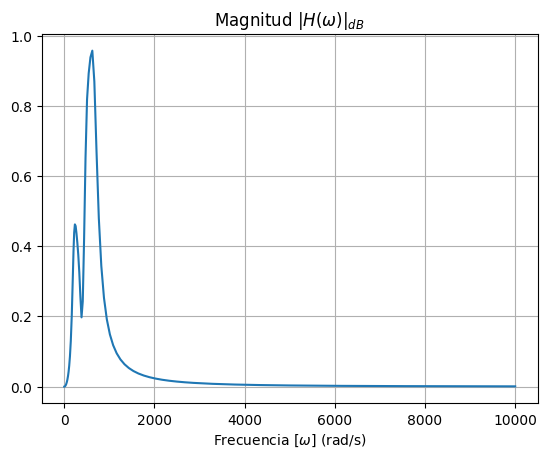

In [11]:
# Ejemplo 4.8 (Parte A). Función de transferencia arbitraria en tiempo continuo
b_s = [8.25e4,2.47e7,2.635e10,3.6416e12,2.3845e15,0,0]
a_s = [1, 6.3639e2, 9.925e5, 4.0057e8, 2.8362e11,6.827e13,2.6797e16,2.958e18, 6.3504e20]

w, Hw = sig.freqs(b_s,a_s) 
fig, axs = plt.subplots()
axs.plot(w, np.abs(Hw))
axs.set_xlabel(r'Frecuencia [$\omega$] (rad/s)')
axs.set_title(r'Magnitud $|H(\omega)|_{dB}$')
axs.grid()
plt.show()

Una forma práctica de realizar la transformación bilineal es tomar $T=T_{s}=\frac{1}{f_{s}}$. Aunque no está definida alguna frecuencia de muestreo $f_{s}$, asumiremos en primera instancia que la frecuencia máxima a procesar, medida a partir de la respuesta en frecuencia del sistema, es $\omega_{max}=4000rad/s$, por lo que la frecuencia de muestreo es $\omega_{s}=2\omega_{max}=8000rad/s$, lo que implica un $T=0.0008$. 

La respuesta en frecuencia del sistema en tiempo discreto $H(z)$ obtenido al aplicar la transformación bilineal con este valor de $T$, usando el comando ``sig.bilinear``, se muestra en la parte izquierda de la figura que resulta al ejecutar el siguiente programa. A su derecha se muestra la forma de la función de mapeo $\Omega=f(\omega)=2\arctan(\omega T/2)$.

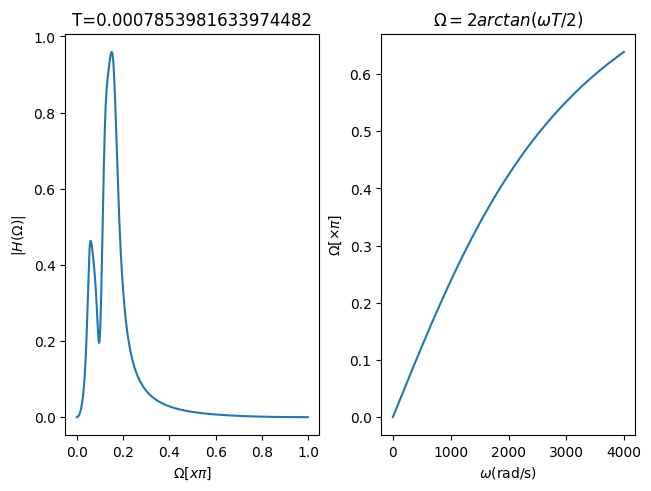

In [12]:
# Ejemplo 4.8 (Parte B). Transformación bilineal a una función de transferencia 
# en tiempo continuo H(s) usando la función sig.bilinear y T=Ts
T = 1/(8000/(2*np.pi))
bk,ak = sig.bilinear(b_s,a_s,fs=1/T)

def plot_transformation(bk,ak,T):
    w,Hw = sig.freqz(bk,ak)
    fig, axs = plt.subplots(1,2,layout='constrained')
    axs[0].plot(w/np.pi,np.abs(Hw))
    axs[0].set_xlabel(r'$\Omega [x \pi]$')
    axs[0].set_ylabel(r'$|H(\Omega)|$')
    axs[0].set_title(f'T={T}')

    w = np.arange(0,4000,5)
    omeg = 2*np.arctan(w*T/2)
    axs[1].plot(w,omeg/np.pi)
    axs[1].set_xlabel(r'$\omega$(rad/s)')
    axs[1].set_ylabel(r'$\Omega[\times\pi]$')
    axs[1].set_title(r'$\Omega=2 arctan(\omega T/2)$')

plot_transformation(bk,ak,T)

Nótese que la respuesta en frecuencia del sistema en tiempo discreto es una aproximación muy buena a la del sistema en tiempo continuo original. Sin embargo, existen otros valores de T que producirían resultados similares. 

Otra forma alternativa de solucionar este problema consiste en asumir un par de frecuencias $(\Omega,\omega)$, y partir de ellas calcular el valor de $T$. Por ejemplo, asumamos que la frecuencia $\omega=4000rad/s$ se mapea a una frecuencia normalizada $\Omega=0.9\pi$. Con estos valores, tenemos que 

$$T=\frac{2}{\omega}\tan\left(\frac{\Omega}{2}\right)=0.0032$$

El resultado de la transformación de $H(s)$ con este valor de $T$ se presenta en las figuras a continuación. A diferencia con la transformación obtenida con $T=0.0008$, se aprecia una expansión del espectro.

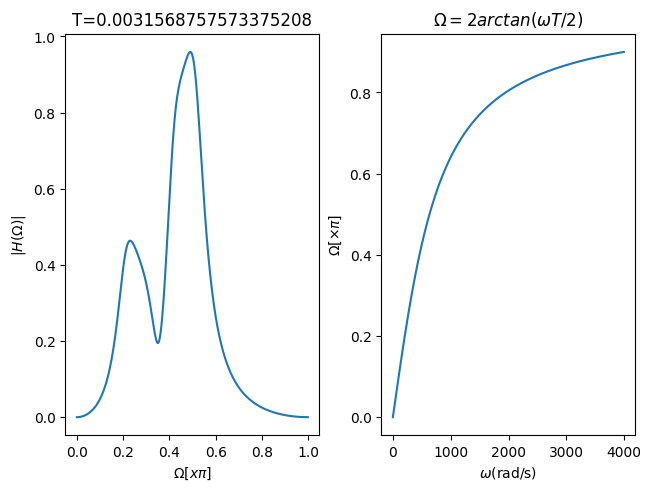

In [13]:
# Ejemplo 4.8 (Parte C). Transformación bilineal a una función de transferencia 
# en tiempo continuo H(s) usando la función sig.bilinear y T calculada

#Calcula T asumiendo que a 4000rad/s hay una frecuencia normalizada de 0.90pi
T = (2/4000)*np.tan(0.90*np.pi/2)
bk,ak = sig.bilinear(b_s,a_s,fs=1/T)

plot_transformation(bk,ak,T)

Aplicando este mismo procedimiento con el par $(0.99\pi,4000rad/s)$, es decir aproximando 4000rad/s a la frecuencia máxima en tiempo discreto $\pi$, se tiene que $T=0.0318$. En este caso, la forma de la respuesta en frecuencia se diferencia de las otras dos transformaciones en que el espectro más significativo se comprime cerca de las frecuencias más altas. Esta distorsión se explica por la forma que adquiere la función de mapeo $\Omega=f(\omega)$, pues para las dos primeras transformaciones, la región de frecuencias más significativas del espectro en tiempo continuo se encuentran en la región lineal de la curva $\Omega=f(\omega)$, en cambio, para la última transformación esta región de frecuencia se encuentra en la zona donde $\Omega=f(\omega)$ es más plana.

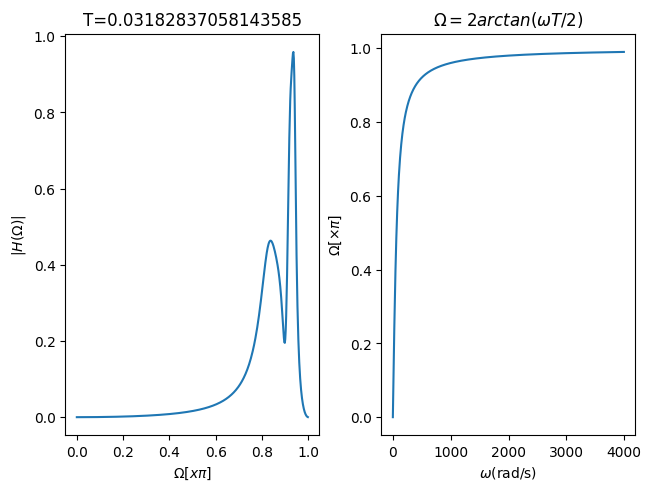

In [14]:
# Ejemplo 4.8 (Parte D). Transformación bilineal a una función de transferencia 
# en tiempo continuo H(s) usando la función sig.bilinear y T calculada

#Calcula T asumiendo que a 4000rad/s hay una 0.99pi
T = (2/4000)*np.tan(0.99*np.pi/2)
bk,ak = sig.bilinear(b_s,a_s,fs=1/T)

plot_transformation(bk,ak,T)

Por lo anterior, se concluye que uno de los mejores valores de $T$ para realizar la transformación bilineal es aquel que se aproxima al periodo de muestreo de la señal. Al calcular el valor de $T$, por medio de un par de frecuencias $(\Omega,\omega)$, se obtienen transformaciones en las que es posible realizar una expansión o comprensión de ciertas regiones de frecuencias. Lo anterior es útil si se desea aplicar la acción del filtro en forma no uniforme a lo largo de una región de baja o alta frecuencia.

### 4.3.2 Invarianza al Impulso

El principio de este método se basa en la discretización de la respuesta al impulso del filtro analógico equivalente, es decir, la función de transferencia en tiempo discreto $H(z)$ se puede determinar mediante el siguiente procedimiento:

1. Determinar la función de transferencia del modelo analógico $H(s)$.

2. Encontrar la respuesta al impulso en tiempo continuo del filtro mediante el cálculo de la transformada inversa de Laplace $h(t)=\mathcal{L}^{-1}\left\{ H(s)\right\}$.

3. Discretizar la respuesta al impulso $h[n]=T_{s} h(nT_{s})$.

4. Calcular la transformada $z$ de $h[n]$ para obtener la función de transferencia $H(z)=\mathcal{Z}\left\{ h[n]\right\}$.

La discretización directa de la respuesta al impulso $h(t)$ trae como consecuencia un mapeo de la frecuencia en tiempo continuo y discreto, relacionado con el período de muestreo $T_{s}$ ($\Omega=2\pi f/f_{s}=\omega T_{s}$):

$$\omega=\frac{\Omega}{T_{s}}$$

lo cual trae un problema práctico, el _aliasing_ del espectro del modelo analógico original. Este aliasing no se presenta con la transformación bilineal, ya que en la invarianza al impulso, un valor de frecuencia de tiempo discreto ($\Omega$) tiene asociado infinitos valores de frecuencia en tiempo continuo ($\omega$). Esta desventaja hace que la invarianza al impulso sea impráctica en la mayoría de los casos, y sea posible utilizarla únicamente para el diseño de filtros digitales pasa-bajos y algunos pasa-banda.

Este método introduce la siguiente transformación en la función de transferencia:

$$z=\exp(sT)$$

por lo tanto, si $z=r\exp(j\Omega)$ y $s=\sigma+j\omega$, vemos que la invarianza al impulso mapea el semi-plano izquierdo de $s$ dentro del círculo unitario, garantizando la estabilidad del sistema en tiempo discreto.

En la práctica, realmente nunca se calcula la transformada inversa de Laplace y la transformada z, en lugar de ello, se prefiere expandir $H(s)$ en fracciones parciales y convertir cada uno de estos términos en su equivalente en z. Lo anteriormente dicho se puede expresar matemáticamente como:

$$H(s)=\frac{(s-z_{1})(s-z_{2})(s-z_{3})...}{(s-p_{1})(s-p_{2})(s-p_{3})...}=\frac{R_{1}}{(s-p_{1})}+\frac{R_{2}}{(s-p_{2})}+\frac{R_{3}}{(s-p_{3})}...$$

donde a cada uno de los términos corresponde la siguiente respuesta al impulso continua:

$$h_{k}(t)=\mathcal{L}^{-1}\left\{ \frac{R_{k}}{s-p_{k}}\right\} =\left\{ \begin{array}{c}
R_{k}exp(p_{k}t)\\
0
\end{array}\,\,\,\begin{array}{c}
t\geq0\\
t<0
\end{array}\right.$$

que una vez discretizada se transforma en 

$$h_{k}[n] = T_{s} R_{k}exp(p_{k} nT_{s})u[n]$$

y cuya transformada $z$ es

$$H_{k}(z)=\mathcal{Z}\left\{ T_{s} R_{k}exp(p_{k}nT_{s}u[n])\right\} =\frac{T_{s}R_{k}z}{z-exp(p_{k}T_{s})}$$

dándonos como resultado la siguiente función de transferencia total:

$$H(z)=\frac{T_{s}R_{1}z}{z-exp(p_{1}T_{s})}+\frac{T_{s}R_{2}z}{z-exp(p_{2}T_{s})}+...$$

es decir, la implementación final corresponde a un conjunto de filtros en paralelo como se muestra en la siguiente figura.

![Invarianza al impulso](../img/cap4_invimpulso.png)

Cuando hay polos complejos conjugados se prefiere la expansión de la función de transferencia $H(s)$ en filtros de segundo orden o superior, y para estas representaciones hay una función de transferencia equivalente $H(z)$ que se puede encontrar en las referencias, o se pueden combinar dos funciones de transferencia de primer orden para producir una de segundo orden como se mostrará en el siguiente ejemplo.


#### Ejemplo 4.9

Suponga que se tiene la siguiente función de transferencia en tiempo continuo $H(s)$ que se quiere discretizar empleando el método de invarianza al impulso para una frecuencia de muestreo de $f_{s}=10kHz$:

$$H(s)=\frac{1.579\times10^{8}}{s^{2}+1.777\times10^{4}s+1.579\times10^{8}}$$

Esta función se puede expandir en fracciones parciales empleando el comando ``sig.residue`` de Python:

In [19]:
# Ejemplo 4.9 (Parte A). Transformación de una función de transferencia 
# continua H(s) por medio del método de invarianza al impulso.
r, p, k = sig.residue([1.579e8], [1, 1.777e4, 1.579e8])
print(f'Residuos: {r}')
print(f'Polos: {p}')
print(f'K: {k}')

Residuos: [0.-8885.00003271j 0.+8885.00003271j]
Polos: [-8885.+8885.76248839j -8885.-8885.76248839j]
K: []


Nótese que esta expansión produjo un polo complejo conjugado $p=-8885 \pm 8885.7624j$. Con los anteriores valores se puede reescribir la función de transferencia como

$$H(s)=\frac{R_{1}}{s-p_{1}} + \frac{R_{2}}{s-p_{2}} = -\frac{8885j}{s+8885-8885.7624j} + \frac{8885j}{s+8885+8885.7624j}$$

que se transformará en

$$H(z)=\frac{T_{s}R_{1}z}{z-exp(p_{1}T_{s})}+\frac{T_{s}R_{2}z}{z-exp(p_{2}T_{s})}$$

Este último paso se calculará por medio del siguiente programa:

In [21]:
# Ejemplo 4.9 (Parte B). Transformación de una función de transferencia 
# continua H(s) por medio del método de invarianza al impulso.

fs = 10000
Ts = 1/fs

# Calcula los coeficientes de cada etapa de primer orden por separado
bk1 = np.array([Ts*r[0],0])
ak1 = np.array([1,-np.exp(p[0]*Ts)])
bk2 = np.array([Ts*r[1],0])
ak2 = np.array([1,-np.exp(p[1]*Ts)])

# Combinas las etapas de primer orden realizando las respectivas operaciones algebraicas
bktotal = sig.convolve(bk1,ak2) + sig.convolve(bk2,ak1)
aktotal = sig.convolve(ak1,ak2)

print('Función de transferencia H(z)')
print(f'bk: {bktotal})')
print(f'ak: {aktotal})')

Función de transferencia H(z)
bk: [0.       +0.j 0.5672524+0.j 0.       +0.j])
ak: [ 1.        +0.j -0.51862884+0.j  0.16914482+0.j])


Entonces la función de transferencia total será

$$H(z)=\frac{0.5672 z^{-1}}{1-0.5186 z^{-1} + 0.1691 z^{-2}}$$

Nótese que el procedimiento anterior puede llegar a ser dispendioso cuando el número de términos es elevado, hay más de un polo complejo conjugado, o si existen raíces repetidas, en cuyo caso la expansión en fracciones parciales no es tan simple como la mostrada en el ejemplo.

Una forma alternativa de llegar a la función de transferencia anterior es usar el comando ``sig.cont2discrete`` como se muestra en el siguiente código:

In [22]:
# Ejemplo 4.9 (Parte C). Transformación de una función de transferencia 
# continua H(s) por medio del método de invarianza al impulso.

bz, az, dt = sig.cont2discrete(([1.579e8], [1, 1.777e4, 1.579e8]), dt=Ts, method='impulse')
print('Función de transferencia H(z)')
print(f'bk: {bz})')
print(f'ak: {az})')

Función de transferencia H(z)
bk: [[0.00000000e+00 5.67252397e-01 1.11022302e-16]])
ak: [ 1.         -0.51862884  0.16914482])


#### Ejemplo 4.10

Transforme la función de transferencia $H(s)$ del Ejemplo 4.8 usando invarianza al impulso.

[[ 0.00000000e+00  4.20560609e-02 -2.35960938e-01  5.57797923e-01
  -7.11144950e-01  5.15808907e-01 -2.01908955e-01  3.33516594e-02
  -1.44328993e-15]]
[  1.          -7.05396284  22.17056493 -40.53924568  47.16313254
 -35.75079357  17.24738171  -4.84364846   0.60664013]


Text(0, 0.5, '$|H(\\Omega)|$')

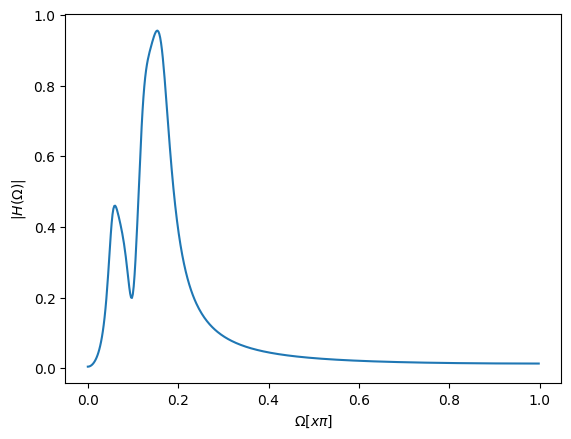

In [24]:
# Ejemplo 4.10. Transformación por invarianza al impulso de la 
# función de transferencia H(s) del Ejemplo 4.8

T = 1/(8000/(2*np.pi))  #Periodo de muestreo
bz, az, dt = sig.cont2discrete((b_s, a_s), dt=T, method='impulse')
print(bz)
print(az)

w,Hw = sig.freqz(bz[0],az)
fig, axs = plt.subplots()
axs.plot(w/np.pi,np.abs(Hw))
axs.set_xlabel(r'$\Omega [x \pi]$')
axs.set_ylabel(r'$|H(\Omega)|$')

## 4.4. Integradores Digitales

A diferencia con la derivada, un integrador se debe construir en forma recursiva. El caso más simple de integrador es el de **suma continua**, en el que la salida del integrador es igual a la suma de la entrada actual más la salida anterior. Otros tipos de integradores, con su respectiva función de transferencia e interpretación geométrica se muestran en la siguiente tabla.

*Tabla 4.4.1*. Tipos de Integradores Digitales

| Nombre | Ecuación en Diferencias | Función de Transferencia | Interpretación Geométrica |
|------|------|------|------|
| Suma continua - _Mantenedor de primer orden_ | $y[n]=y[n-1]+x[n]$ | $H(z)=\frac{1}{1-z^{-1}}$ | ![Integrador suma continua](../img/cap4_integrador1.png) |
| Trapezoidal - _Mantenedor de segundo orden_ | $y[n]=y[n-1]+\frac{1}{2}(x[n]+x[n-1])$ | $H(z)=\frac{z+1}{2(z-1)}$ | ![Integrador trapezoidal](../img/cap4_integrador2.png) |
| Regla de Simpson - _Interpolación cuadrática entre los puntos_ | $y[n]=y[n-2]+\frac{1}{3}(x[n]-4x[n-1]+x[n-2])$ |	$H(z)=\frac{z^{2}+4z+1}{3(z^{2}-1)}$ | ![Integrador Simposon](../img/cap4_integrador3.png) |

Para comparar la respuesta de los integradores digitales con uno ideal (analógico), se tiene en un integrador analógico un desplazamiento en la fase de $\pi/2$ ($90^{o}$) y una respuesta en magnitud que depende inversamente de la frecuencia. Lo anterior se ve más claramente si integramos una función coseno, $\int cos(\omega t)dt=\frac{1}{\omega}sen(\omega t)$, donde notamos que la señal de salida tiene una diferencia de fase de noventa grados con respecto a la señal de entrada, pero la amplitud de la señal de salida decae al aumentar la frecuencia.

En el siguiente programa se muestra la respuesta en frecuencia de cada uno de los integradores digitales.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16324\4006263605.py:21: RuntimeWarning: divide by zero encountered in divide
  Hideal = 1/(1j*w1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16324\4006263605.py:21: RuntimeWarning: invalid value encountered in divide
  Hideal = 1/(1j*w1)


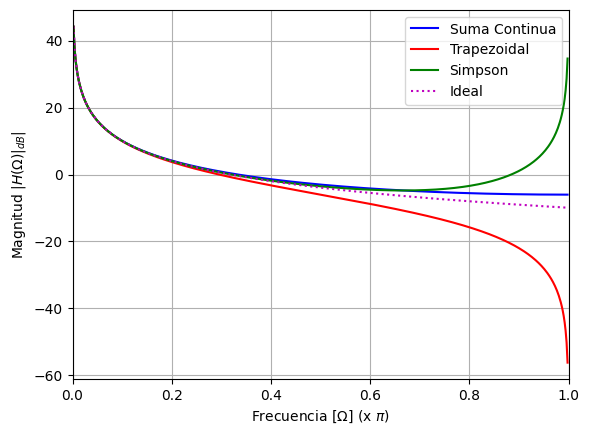

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# integrador de suma continua
hsumacont_b = [1, 0]
hsumacont_a = [1, -1]
w1,Hsum = sig.freqz(hsumacont_b, hsumacont_a)

# integrador trapezoidal
htrap_b = [1, 1]
htrap_a = [2, -2]
w2, Htrap = sig.freqz(htrap_b, htrap_a)

# integrador Simpson
hsimp_b = [1,4,1]
hsimp_a = [3,0,-3]
w3,Hsimp = sig.freqz(hsimp_b, hsimp_a)

# integrador ideal
Hideal = 1/(1j*w1)

#Grafica las respuestas en frecuencia en decibeles

fig, axs = plt.subplots()
axs.plot(w1/np.pi, 20*np.log10(np.abs(Hsum)), 'b-', label='Suma Continua')
axs.plot(w2/np.pi, 20*np.log10(np.abs(Htrap)), 'r-', label='Trapezoidal')
axs.plot(w3/np.pi, 20*np.log10(np.abs(Hsimp)), 'g-', label='Simpson')
axs.plot(w1/np.pi, 20*np.log10(np.abs(Hideal)), 'm:', label='Ideal')
#axs.plot(w1/np.pi, np.abs(Hsum), 'b-', label='Suma Continua')
axs.set_xlabel(r'Frecuencia [$\Omega$] (x $\pi$)')
axs.set_ylabel(r'Magnitud $|H(\Omega)|_{dB}$|')
axs.set(xlim=(0,1))
axs.grid()
axs.legend()
plt.show()

Podemos observar que, 

* El integrador de suma continua tiene la respuesta en frecuencia más cercana al integrador ideal. 

* El integrador trapezoidal en cambio, atenúa más las componentes de alta frecuencia que cualquier otro tipo de integrador. Esto se presenta cerca de $0.6\pi$. Esta característica es ideal para aplicaciones donde se requiera integrar y filtrar las componentes de alta frecuencia. 

* El integrador de Simpson por su parte, acentúa las componentes de alta frecuencia para $\Omega$ por encima de $0.7\pi$. 

* Todos los integradores digitales no tienen acotada la respuesta en frecuencia para $\Omega=0$, debido a la existencia de polos en el círculo unitario para esta frecuencia. Esta característica podría considerarse indeseable, pero es propia de los integradores.